In [1]:
import torch
import torchvision
from torchvision import transforms

In [2]:
if(torch.cuda.is_available()):
    device = torch.device("cuda")
    print(device, torch.cuda.get_device_name(0))
else:
    device= torch.device("cpu")
    print(device)

cuda Tesla K80


In [3]:
model = torchvision.models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


In [4]:
model.eval()
model.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [5]:
from google.colab import files
uploaded = files.upload()

Saving cat.jpg to cat.jpg


In [6]:
fnameLst = list(uploaded.keys())
fname = fnameLst[0]
print(fname)

cat.jpg


In [7]:
import cv2
import matplotlib.pyplot as plt

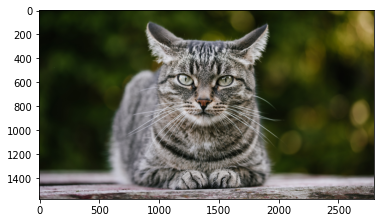

In [8]:
image = cv2.imread(fname)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.imshow(image)
plt.show()

In [9]:
transformer = transforms.Compose([
     transforms.Resize(224),
     transforms.CenterCrop(224),            
     transforms.ToTensor(),                     
     transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5] )])

In [10]:
from PIL import Image

In [11]:
PILImg= Image.fromarray(image.astype('uint8')).convert('RGB')
PILImg = transformer(PILImg)
PILImg.shape

torch.Size([3, 224, 224])

# Visualize the input image after preprocessing

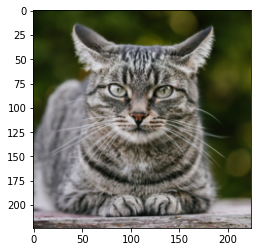

In [13]:
import numpy as np
# Tensor is channel first, to plot, we need to convert to channel last
PILImgArray = np.zeros((PILImg.shape[1], PILImg.shape[2], 3))
PILImgArray[:,:,0] = PILImg[0, :, :]  
PILImgArray[:,:,1] = PILImg[1, :, :]
PILImgArray[:,:,2] = PILImg[2, :, :]
PILImgArray = PILImgArray*0.5+0.5  # 把 -1~1 變成 0~1
plt.imshow(PILImgArray)
plt.show()

# Visualize feature maps from first Conv layer

In [14]:
imageTensor = torch.unsqueeze(PILImg, 0)
imageTensor.shape

torch.Size([1, 3, 224, 224])

In [15]:
conv1 = model.features[0]
print(conv1) #InChannel=3(RGB), OutChannel=64, convolution filter size=11, stride=4, padding=2

Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))


In [16]:
weight1 = conv1.weight.data.cpu().numpy()
print(weight1.shape) #64個convolution filters, 每個filter 的 depth=3, 有11*11個參數 

(64, 3, 11, 11)


In [17]:
conv1_out = conv1(imageTensor.to(device))
conv1_out.shape #輸入影像通過第一層convolution layer後產生64個feature maps

torch.Size([1, 64, 55, 55])

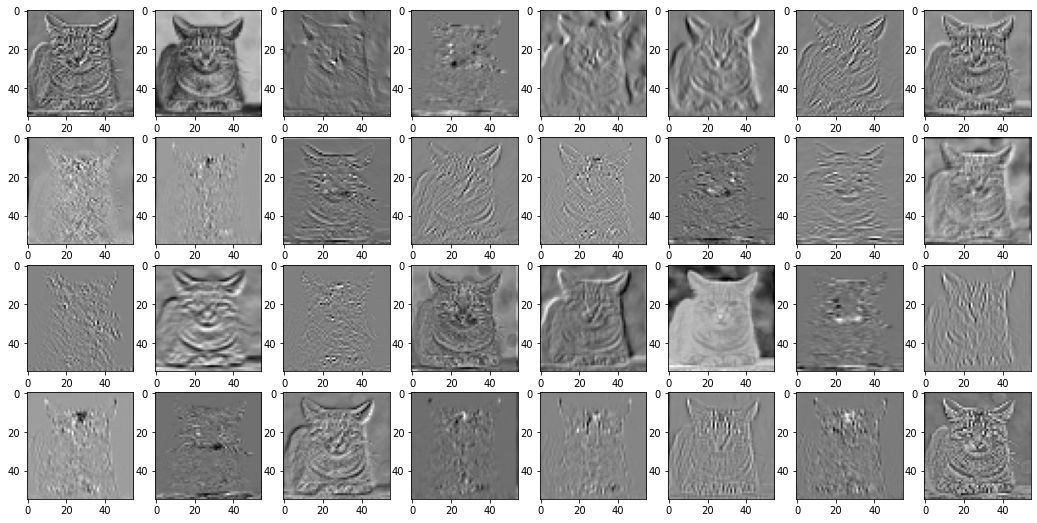

In [20]:
# Visualize 輸入影像通過第一層convolution layer後產生32 out of 64個feature maps 
imgArray=conv1_out[0].data.cpu().numpy()
fig=plt.figure(figsize=(18, 9))
for i in range(32):
    fig.add_subplot(4, 8, i+1) 
    plt.imshow(imgArray[i], cmap='gray')
plt.show()

In [22]:
conv12 = model.features[0:4]
print(conv12)  
# (0) 輸入影像(RGB)->第1層Conv layer->64個feature maps
# (3) 64個feature maps->第2層Conv layer->192個feature maps

Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
)


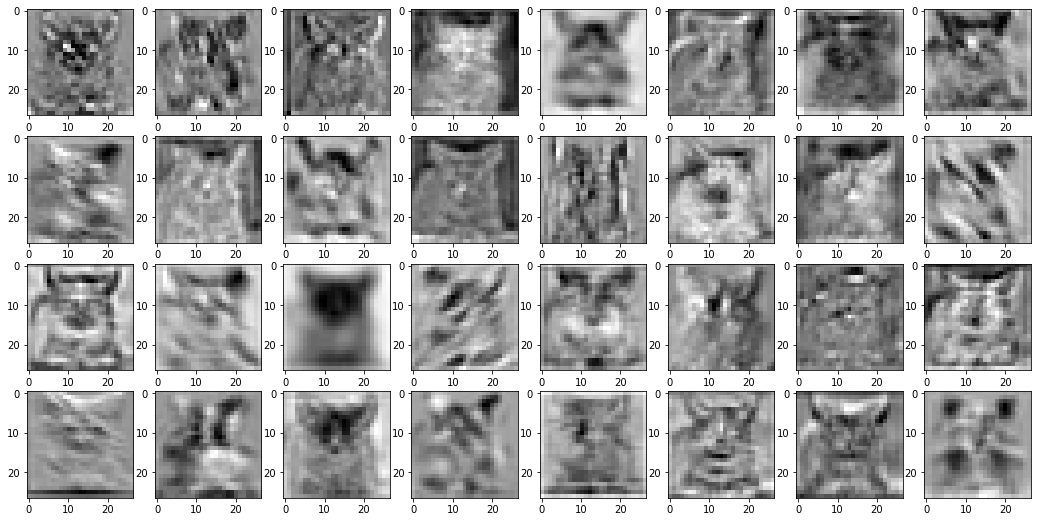

In [23]:
# take a look at the first 32 out of 192 feature maps from conv layer 2
conv12_out = conv12(imageTensor.to(device))
imgArray=conv12_out[0].data.cpu().numpy()
fig=plt.figure(figsize=(18, 9))
for i in range(32):
    fig.add_subplot(4, 8, i+1) 
    plt.imshow(imgArray[i], cmap='gray')
plt.show()

In [24]:
# take a look at conv layer 3
conv13 = model.features[0:7]
print(conv13)
# (0) 輸入影像(RGB)->第1層Conv layer->64個feature maps
# (3) 64個feature maps->第2層Conv layer->192個feature maps
# (6) 192個feature maps->第3層Conv layer->384個feature maps

Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)


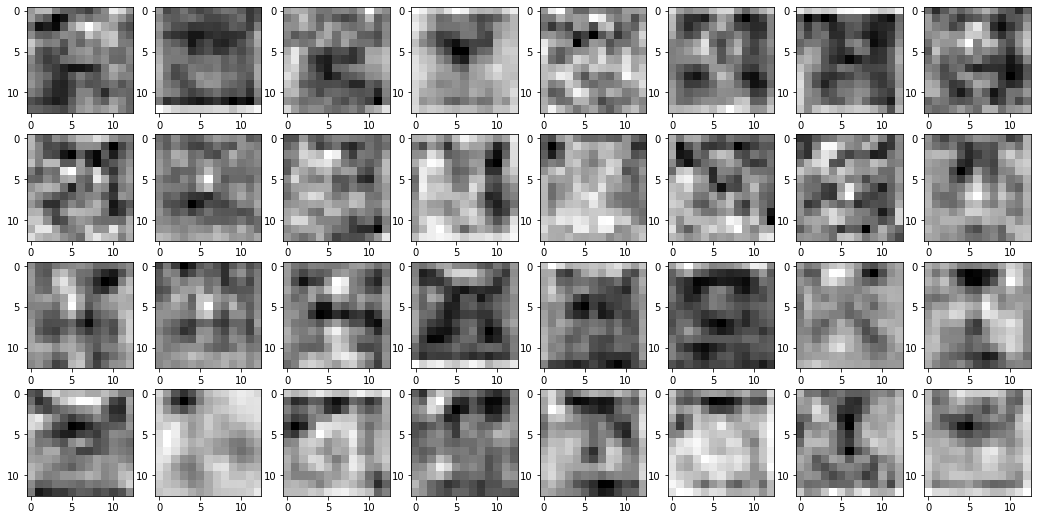

In [26]:
# take a look at the first 32 out of 384 feature maps from conv layer 3
conv13_out = conv13(imageTensor.to(device))
imgArray=conv13_out[0].data.cpu().numpy()
fig=plt.figure(figsize=(18, 9))
for i in range(32):
    fig.add_subplot(4, 8, i+1) 
    plt.imshow(imgArray[i], cmap='gray')
plt.show()

In [27]:
conv1to5 = model.features[0:13]
print(conv1to5)
# (0) 輸入影像(RGB)->第1層Conv layer->64個feature maps
# (3) 64個feature maps->第2層Conv layer->192個feature maps
# (6) 192個feature maps->第3層Conv layer->384個feature maps
# (8) 384個feature maps->第4層Conv layer->256個feature maps
# (10) 256個feature maps->第5層Conv layer->256個feature maps

Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace=True)
  (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace=True)
  (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
)


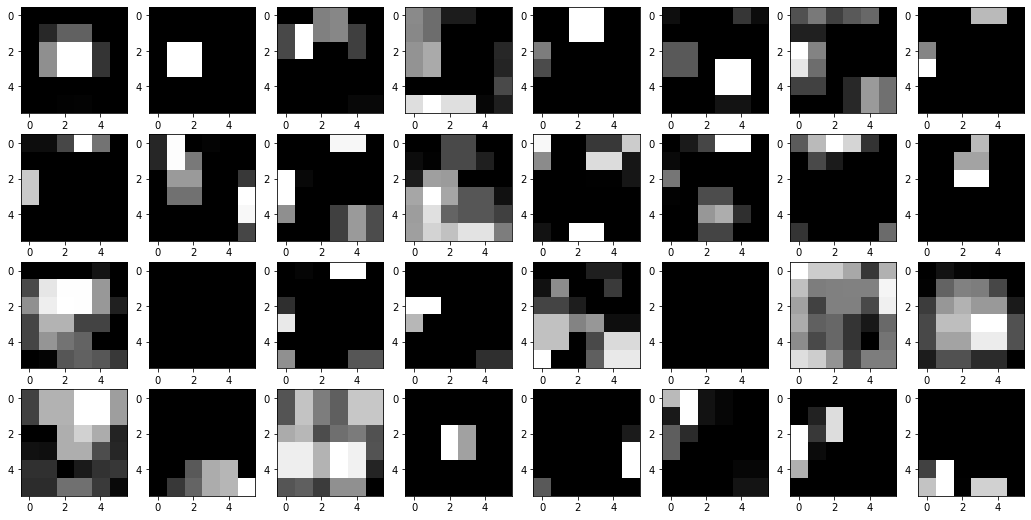

In [28]:
# take a look at the first 32 out of 256 feature maps from conv layer 5
conv1to5_out = conv1to5(imageTensor.to(device))
imgArray=conv1to5_out[0].data.cpu().numpy()
fig=plt.figure(figsize=(18, 9))
for i in range(32):
    fig.add_subplot(4, 8, i+1) 
    plt.imshow(imgArray[i], cmap='gray')
plt.show()